In [1]:
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

This tutorial is taken largely from scanpy's own tutorial but applied to Jason Morrison's chick embryo data.

https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html

The following are all that are necessary in a python 3.7 environment (other python versions not tested)

pip install jupyter numpy pandas matplotlib seaborn plotly scanpy leidenalg

Configure some display stuff for scanpy

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white', figsize=[15,15])

# Load data, explore adata

Load a csv file with our gene matrix, we will call it adata to be consistent with a tutorial in https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html

In [3]:
adata=sc.read_csv('sc_counts.csv')
adata

AnnData object with n_obs × n_vars = 13458 × 17591

To access the current matrix, we can use adata.X

In [62]:
adata.X

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0., 10.,  0.],
       [ 0.,  0.,  0., ...,  0.,  7.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0., 65.,  0.],
       [ 0.,  0.,  0., ...,  0., 14.,  0.],
       [ 0.,  1.,  1., ...,  0., 19.,  0.]], dtype=float32)

To find the number of observations (cells or beads) and the number of genes, we can just get the shape.  The rows are the observations and the columns are the gene_ids.

In [8]:
adata.shape

(13458, 17591)

To access the observation barcodes, we can use adata.obs.  However if we wanted to change them, this is a pandas dataframe, so we would have to assign using adata.obs.index = 

In [64]:
adata.obs

Empty DataFrame
Columns: []
Index: [AAACCCAAGCTGTACT, AAACCCAAGTAATACG, AAACCCAAGTGAGCCA, AAACCCAGTAAGCAAT, AAACCCAGTACAATAG, AAACCCAGTAGGAGGG, AAACCCAGTCGCTTAA, AAACCCAGTGAAAGTT, AAACCCAGTGCCGTAC, AAACCCAGTGCTTATG, AAACCCATCAAACGAA, AAACCCATCCCATAAG, AAACCCATCCGAAATC, AAACCCATCCGTCCTA, AAACCCATCTATTCGT, AAACCCATCTTAGCCC, AAACGAAAGTACCATC, AAACGAAGTACGGATG, AAACGAAGTCAACATC, AAACGAAGTCACTCGG, AAACGAAGTGTATTCG, AAACGAATCTTTCAGT, AAACGCTAGAACTGAT, AAACGCTAGCAGCAGT, AAACGCTAGCCTTTGA, AAACGCTAGGCATCTT, AAACGCTCAAATGGTA, AAACGCTCAACATCGT, AAACGCTCAAGAGGCT, AAACGCTCAATCGCAT, AAACGCTCAATGGCCC, AAACGCTCAGTTAAAG, AAACGCTCATGGCCCA, AAACGCTGTACTTGTG, AAACGCTGTCAATGGG, AAACGCTGTGGAGGTT, AAACGCTGTTGACTAC, AAACGCTTCATAAGGA, AAACGCTTCGTGTGGC, AAACGCTTCTCGGGAC, AAAGAACAGGACTTCT, AAAGAACCAACACACT, AAAGAACCAACCACAT, AAAGAACCACAAGTTC, AAAGAACCAGCTACAT, AAAGAACCATAGATGA, AAAGAACCATGTTTGG, AAAGAACGTACTTGTG, AAAGAACGTGAGATCG, AAAGAACGTGATACCT, AAAGAACGTTACCGTA, AAAGAACGTTCGAGCC, AAAGAACGTTCTTAGG, AAAGAACGTTGGACCC, AAAGAACTCAACCCGG, AAAGAACTCAGAGCGA, AAAGAACTCAGCCTTC, AAAGAACTCCCAGCGA, AAAGAACTCTTACCGC, AAAGGATAGACTTCAC, AAAGGATAGATCGCTT, AAAGGATAGCAGCACA, AAAGGATAGCGTGCTC, AAAGGATAGCTAGAGC, AAAGGATAGCTATCCA, AAAGGATAGGTCTTTG, AAAGGATCAACCGACC, AAAGGATCAACGACAG, AAAGGATCAAGAGTAT, AAAGGATCAGCGGTTC, AAAGGATCATCCTCAC, AAAGGATGTCAAGGCA, AAAGGATGTCACCACG, AAAGGATGTGAGTGAC, AAAGGATGTGCTTCAA, AAAGGATGTGTTCCAA, AAAGGATTCAAGTGTC, AAAGGATTCTCTGACC, AAAGGATTCTTCTCAA, AAAGGGCAGAGATTCA, AAAGGGCAGCGTGTCC, AAAGGGCAGGTAGGCT, AAAGGGCCAACGGGTA, AAAGGGCCAATCAGCT, AAAGGGCCACATATGC, AAAGGGCCAGTAACGG, AAAGGGCCAGTAGTGG, AAAGGGCCATTGCTTT, AAAGGGCGTAGACGTG, AAAGGGCGTGGGCTTC, AAAGGGCTCAAGGTGG, AAAGGGCTCCGATGTA, AAAGGGCTCTACCAGA, AAAGGGCTCTGGCCTT, AAAGGTAAGATGCCGA, AAAGGTAAGCCAGACA, AAAGGTAAGGCTAGCA, AAAGGTAAGGGCAGGA, AAAGGTACAAACGTGG, AAAGGTACAAGCTGCC, ...]

[13458 rows x 0 columns]

Likewise adata.var gives us access to the gene ids.  These we will be changing because no one knows what the heck ENSGALG00000042023 is.  Again in order to change, we would need to use adata.var.index = 

In [65]:
adata.var

Empty DataFrame
Columns: []
Index: [ENSGALG00000045540, ENSGALG00000051297, ENSGALG00000042023, ENSGALG00000029624, ENSGALG00000038527, ENSGALG00000052679, ENSGALG00000042611, ENSGALG00000050315, ENSGALG00000049873, ENSGALG00000053510, ENSGALG00000050833, ENSGALG00000051677, ENSGALG00000041494, ENSGALG00000039682, ENSGALG00000038044, ENSGALG00000032458, ENSGALG00000035824, ENSGALG00000033919, ENSGALG00000051055, ENSGALG00000052929, ENSGALG00000054904, ENSGALG00000046797, ENSGALG00000050267, ENSGALG00000047194, ENSGALG00000031473, ENSGALG00000054662, ENSGALG00000053846, ENSGALG00000051962, ENSGALG00000047166, ENSGALG00000048258, ENSGALG00000054512, ENSGALG00000054297, ENSGALG00000049264, ENSGALG00000043476, ENSGALG00000033149, ENSGALG00000043771, ENSGALG00000029341, ENSGALG00000043178, ENSGALG00000041965, ENSGALG00000041528, ENSGALG00000054793, ENSGALG00000046885, ENSGALG00000039982, ENSGALG00000039420, ENSGALG00000051854, ENSGALG00000036114, ENSGALG00000032868, ENSGALG00000038520, ENSGALG00000047596, ENSGALG00000040060, ENSGALG00000031975, ENSGALG00000008003, ENSGALG00000008013, ENSGALG00000008036, ENSGALG00000008103, ENSGALG00000008111, ENSGALG00000008144, ENSGALG00000008153, ENSGALG00000008162, ENSGALG00000008168, ENSGALG00000008169, ENSGALG00000055101, ENSGALG00000008401, ENSGALG00000008424, ENSGALG00000008437, ENSGALG00000050230, ENSGALG00000047026, ENSGALG00000008444, ENSGALG00000032978, ENSGALG00000047442, ENSGALG00000038187, ENSGALG00000037842, ENSGALG00000008477, ENSGALG00000028216, ENSGALG00000006489, ENSGALG00000006473, ENSGALG00000047975, ENSGALG00000006409, ENSGALG00000006356, ENSGALG00000051559, ENSGALG00000048728, ENSGALG00000050475, ENSGALG00000041978, ENSGALG00000006332, ENSGALG00000040369, ENSGALG00000034970, ENSGALG00000009279, ENSGALG00000053050, ENSGALG00000029446, ENSGALG00000006891, ENSGALG00000006833, ENSGALG00000030702, ENSGALG00000006753, ENSGALG00000006731, ENSGALG00000029270, ENSGALG00000049441, ENSGALG00000034590, ENSGALG00000049014, ENSGALG00000046927, ENSGALG00000035563, ...]

[17591 rows x 0 columns]

# Fixing gene names

Load the mapping file from Madeleine

In [9]:
mapping_df=pd.read_csv('galGal6.Ens_98.gene_data.txt', sep='\t')

In [10]:
mapping_df

Gene_ID  Name Chrom  Start     End Strand  Genomic_Len  \
0      ENSGALG00000054818   NaN  chr1   5273   10061      -         4789   
1      ENSGALG00000053455   NaN  chr1   9441   14305      +         4865   
2      ENSGALG00000045540   NaN  chr1  27209   33555      +         6347   
3      ENSGALG00000051297   NaN  chr1  31439  243537      +       212099   
4      ENSGALG00000042023   NaN  chr1  39057   42408      -         3352   
...                   ...   ...   ...    ...     ...    ...          ...   
24351  ENSGALG00000032079  CYTB  chrM  14893   16035      +         1143   
24352  ENSGALG00000032370   NaN  chrM  16039   16107      +           69   
24353  ENSGALG00000042677   NaN  chrM  16108   16177      -           70   
24354  ENSGALG00000037838   ND6  chrM  16184   16705      -          522   
24355  ENSGALG00000039249   NaN  chrM  16708   16775      -           68   

       Exonic_Len  CDS_Len  N_Trans  N_Exons         Biotype   SimpleBiotype  \
0            2018      786        3       12  protein_coding  protein_coding   
1            4754     1600        2       10  protein_coding  protein_coding   
2             955      714        1       10  protein_coding  protein_coding   
3            1050      414        1       10  protein_coding  protein_coding   
4            2161     1492        2       12  protein_coding  protein_coding   
...           ...      ...      ...      ...             ...             ...   
24351        1143     1143        1        2  protein_coding  protein_coding   
24352          69        0        1        2         Mt_tRNA           ncRNA   
24353          70        0        1        2         Mt_tRNA           ncRNA   
24354         522      522        1        2  protein_coding  protein_coding   
24355          68        0        1        2         Mt_tRNA           ncRNA   

       Version  Status  CDS_Genomic_Start  CDS_Genomic_End  \
0            1     NaN             5273.0           8715.0   
1            1     NaN             9854.0          11564.0   
2            2     NaN            27323.0          33428.0   
3            1     NaN            53990.0         243055.0   
4            3     NaN            39726.0          42408.0   
...        ...     ...                ...              ...   
24351        1     NaN            14893.0          16035.0   
24352        1     NaN                NaN              NaN   
24353        1     NaN                NaN              NaN   
24354        1     NaN            16184.0          16705.0   
24355        1     NaN                NaN              NaN   

                                             Description  
0      inosine-5'-monophosphate dehydrogenase 1-like ...  
1                                                    NaN  
2      C-type lectin domain family 2 member D-like 5 ...  
3                                                    NaN  
4                                                    NaN  
...                                                  ...  
24351       cytochrome b [Source:NCBI gene;Acc:39116918]  
24352                                                NaN  
24353                                                NaN  
24354  NADH dehydrogenase subunit 6 [Source:NCBI gene...  
24355                                                NaN  

[24356 rows x 18 columns]

There is a lot of useless info in there, the only things we need are Gene_ID and Name.  But one thing we need to fix is all of the NaNs, if the Name is NaN we want to just replace the name with Gene_ID.

In [11]:
mapping_df.loc[mapping_df['Name'].isna(),'Name'] = mapping_df.loc[mapping_df['Name'].isna(),'Gene_ID']
mapping_df

Gene_ID                Name Chrom  Start     End Strand  \
0      ENSGALG00000054818  ENSGALG00000054818  chr1   5273   10061      -   
1      ENSGALG00000053455  ENSGALG00000053455  chr1   9441   14305      +   
2      ENSGALG00000045540  ENSGALG00000045540  chr1  27209   33555      +   
3      ENSGALG00000051297  ENSGALG00000051297  chr1  31439  243537      +   
4      ENSGALG00000042023  ENSGALG00000042023  chr1  39057   42408      -   
...                   ...                 ...   ...    ...     ...    ...   
24351  ENSGALG00000032079                CYTB  chrM  14893   16035      +   
24352  ENSGALG00000032370  ENSGALG00000032370  chrM  16039   16107      +   
24353  ENSGALG00000042677  ENSGALG00000042677  chrM  16108   16177      -   
24354  ENSGALG00000037838                 ND6  chrM  16184   16705      -   
24355  ENSGALG00000039249  ENSGALG00000039249  chrM  16708   16775      -   

       Genomic_Len  Exonic_Len  CDS_Len  N_Trans  N_Exons         Biotype  \
0             4789        2018      786        3       12  protein_coding   
1             4865        4754     1600        2       10  protein_coding   
2             6347         955      714        1       10  protein_coding   
3           212099        1050      414        1       10  protein_coding   
4             3352        2161     1492        2       12  protein_coding   
...            ...         ...      ...      ...      ...             ...   
24351         1143        1143     1143        1        2  protein_coding   
24352           69          69        0        1        2         Mt_tRNA   
24353           70          70        0        1        2         Mt_tRNA   
24354          522         522      522        1        2  protein_coding   
24355           68          68        0        1        2         Mt_tRNA   

        SimpleBiotype  Version  Status  CDS_Genomic_Start  CDS_Genomic_End  \
0      protein_coding        1     NaN             5273.0           8715.0   
1      protein_coding        1     NaN             9854.0          11564.0   
2      protein_coding        2     NaN            27323.0          33428.0   
3      protein_coding        1     NaN            53990.0         243055.0   
4      protein_coding        3     NaN            39726.0          42408.0   
...               ...      ...     ...                ...              ...   
24351  protein_coding        1     NaN            14893.0          16035.0   
24352           ncRNA        1     NaN                NaN              NaN   
24353           ncRNA        1     NaN                NaN              NaN   
24354  protein_coding        1     NaN            16184.0          16705.0   
24355           ncRNA        1     NaN                NaN              NaN   

                                             Description  
0      inosine-5'-monophosphate dehydrogenase 1-like ...  
1                                                    NaN  
2      C-type lectin domain family 2 member D-like 5 ...  
3                                                    NaN  
4                                                    NaN  
...                                                  ...  
24351       cytochrome b [Source:NCBI gene;Acc:39116918]  
24352                                                NaN  
24353                                                NaN  
24354  NADH dehydrogenase subunit 6 [Source:NCBI gene...  
24355                                                NaN  

[24356 rows x 18 columns]

Now we can use pandas' awesome merge function on adata.  This will create a new table where the Gene_IDs are ordered like our adata.var, and we can just extract the Name

In [12]:
adata.var.index = adata.var.merge(mapping_df, right_on = 'Gene_ID', left_index=True)['Name']

In [13]:
adata.var

Empty DataFrame
Columns: []
Index: [ENSGALG00000045540, ENSGALG00000051297, ENSGALG00000042023, DHRS4, CARMIL3, ENSGALG00000052679, ENSGALG00000042611, CLC2DL3, ENSGALG00000049873, ENSGALG00000053510, ENSGALG00000050833, ENSGALG00000051677, GOLGB1, HCLS1, NME6, RABL2A, ARSA, ENSGALG00000033919, MAPK8IP2, ENSGALG00000052929, ENSGALG00000054904, ENSGALG00000046797, CALU, ENSGALG00000047194, ENSGALG00000031473, ENSGALG00000054662, ENSGALG00000053846, ENSGALG00000051962, ENSGALG00000047166, ENSGALG00000048258, ENSGALG00000054512, ENSGALG00000054297, ENSGALG00000049264, ARF5, GCC1, DENND6B, PPP6R2, SBF1, MIOX, LMF2, NCAPH2, SCO2, IRF5, TNPO3, ENSGALG00000051854, SMO, AHCYL2, STRIP2, SMKR1, NRF1, UBE2H, ZC3HC1, KLHDC10, TMEM209, CEP41, MEST, COPG2, ENSGALG00000008153, FBXO18, ANKRD16, GDI1, TASOR2, ASB13, CALML3, NET1, ENSGALG00000050230, ENSGALG00000047026, TUBAL3, ENSGALG00000032978, ENSGALG00000047442, SLC35B4, LRGUK, EXOC4, gga-mir-6659, CHCHD3, PLXNA4, ENSGALG00000047975, PODXL, MKLN1, ENSGALG00000051559, ENSGALG00000048728, ENSGALG00000050475, K123, RBM17, PFKFB3, ENSGALG00000034970, SFMBT2, ENSGALG00000053050, ENSGALG00000029446, ITIH5, ITIH2, KIN, ATP5C1, TAF3, GATA3, ENSGALG00000049441, CELF2, ENSGALG00000049014, ENSGALG00000046927, USP6NL, ...]

[17591 rows x 0 columns]

# Accessing data

It is easy enough to slice into our AnnData variable, much like a dataframe

In [14]:
adata.shape

(13458, 17591)

Let's make a boolean array of those genes that have a read number higher than 1000.

In [20]:
high_expressing_genes = np.sum(adata.X, axis=0)>1000
np.sum(high_expressing_genes)

5311

Now we'll slice just those entries.  It is returned as a view, which allows us to make modifications on the original.

In [22]:
adata[:,high_expressing_genes]

View of AnnData object with n_obs × n_vars = 13458 × 5311

If we don't want to modify the original, we can make a copy.

In [23]:
cdata = adata[:,high_expressing_genes].copy()

We can likewise slice the cells or "observations"

In [24]:
high_expressing_cells = np.sum(adata.X, axis=1)>10000

In [27]:
cdata = adata[high_expressing_cells,:]
cdata.shape

(1214, 17591)

In [28]:
cdata.shape

(1214, 17591)

# Filtering

Scanpy recommends making gene names unique, so just in case there are duplicates we will go ahead and do that.

In [29]:
adata.var_names_make_unique()

Now let's look at the most highly expressed genes

normalizing counts per cell
    finished (0:00:00)


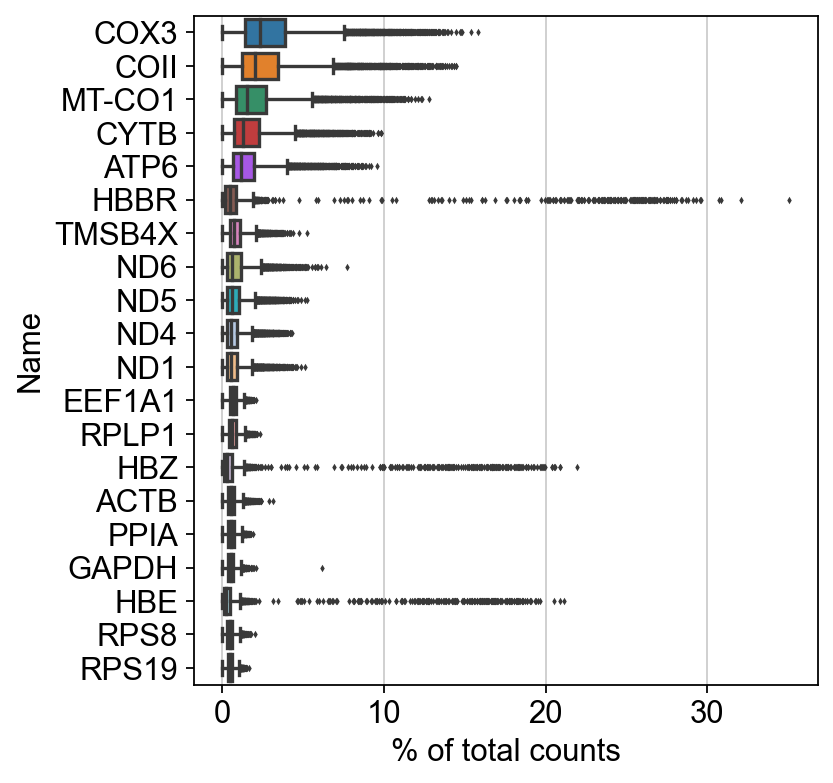

In [30]:
sc.pl.highest_expr_genes(adata, n_top=20, )

### Filtering on number of cells and genes

In [31]:
adata

AnnData object with n_obs × n_vars = 13458 × 17591

In [32]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
adata

c:\users\smc\anaconda3\envs\sc\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


filtered out 672 genes that are detected in less than 3 cells


AnnData object with n_obs × n_vars = 13458 × 16919
    obs: 'n_genes'
    var: 'n_cells'

Note our .obs and .var dataframes now have information in them.  The filtering process has tabulated how many total unique genes have reads for each observation (cell or bead) and how many observations have more than 0 reads for each gene

In [33]:
adata.var

n_cells
Name                       
ENSGALG00000045540       52
ENSGALG00000051297      542
ENSGALG00000042023     1796
DHRS4                  2551
CARMIL3                 246
...                     ...
CYTB                  13312
ENSGALG00000032370        3
ENSGALG00000042677       92
ND6                   13163
ENSGALG00000039249       24

[16919 rows x 1 columns]

### Annotating mitochondrial genes and calculating qc metrics

Let's make note of genes that have a MT- prefix, these are mitochondrial genes and we don't want them to impact analysis too much.  For now we will just create a new column ('mt') in our gene table which simply is true if that gene begins with MT-

In [36]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
adata

AnnData object with n_obs × n_vars = 13458 × 16919
    obs: 'n_genes'
    var: 'n_cells', 'mt'

Now we will calculate a bunch of quality metrics, and we can include a True/False table like our new 'mt' column

In [37]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata #Just to show the new entries in our .obs and .var table

AnnData object with n_obs × n_vars = 13458 × 16919
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

.obs now has how many unique genes (n_genes) the same thing as far as I can tell (n_genes_by_counts) the TOTAL counts for that observation (total_counts) how many mitochondrial gene counts it has (total_counts_mt) and the percent of total counts that are mitochondrial (pct_counts_mt).

In [38]:
adata.obs

n_genes  n_genes_by_counts  total_counts  total_counts_mt  \
AAACCCAAGCTGTACT      552                552         985.0              8.0   
AAACCCAAGTAATACG      517                517        1078.0             24.0   
AAACCCAAGTGAGCCA      710                710        1478.0             32.0   
AAACCCAGTAAGCAAT     2153               2153        7202.0            138.0   
AAACCCAGTACAATAG      701                701        1336.0             17.0   
...                   ...                ...           ...              ...   
TTTGTTGGTTCCACGG      787                787        2439.0            235.0   
TTTGTTGGTTCCCAAA      526                526        1030.0             23.0   
TTTGTTGTCCACGTGG     1037               1037        2300.0             91.0   
TTTGTTGTCCACTTCG      531                531        1123.0             30.0   
TTTGTTGTCCATTGTT     1608               1608        4520.0             74.0   

                  pct_counts_mt  
AAACCCAAGCTGTACT       0.812183  
AAACCCAAGTAATACG       2.226345  
AAACCCAAGTGAGCCA       2.165088  
AAACCCAGTAAGCAAT       1.916134  
AAACCCAGTACAATAG       1.272455  
...                         ...  
TTTGTTGGTTCCACGG       9.635096  
TTTGTTGGTTCCCAAA       2.233010  
TTTGTTGTCCACGTGG       3.956522  
TTTGTTGTCCACTTCG       2.671416  
TTTGTTGTCCATTGTT       1.637168  

[13458 rows x 5 columns]

.var now as how many cells express that gene (n_cells), whether it is mitochondrial (mt), the mean number of counts for that gene (mean_counts), the percentage of observations that do NOT have that gene (pct_dropout_by_counts) and the total number of counts over all observations of that gene (total_counts)

In [39]:
adata.var

n_cells     mt  n_cells_by_counts  mean_counts  \
Name                                                                 
ENSGALG00000045540       52  False                 52     0.003864   
ENSGALG00000051297      542  False                542     0.042651   
ENSGALG00000042023     1796  False               1796     0.169936   
DHRS4                  2551  False               2551     0.250111   
CARMIL3                 246  False                246     0.019022   
...                     ...    ...                ...          ...   
CYTB                  13312  False              13312    53.149872   
ENSGALG00000032370        3  False                  3     0.000223   
ENSGALG00000042677       92  False                 92     0.006985   
ND6                   13163  False              13163    25.763041   
ENSGALG00000039249       24  False                 24     0.001783   

                    pct_dropout_by_counts  total_counts  
Name                                                     
ENSGALG00000045540              99.613613          52.0  
ENSGALG00000051297              95.972656         574.0  
ENSGALG00000042023              86.654778        2287.0  
DHRS4                           81.044732        3366.0  
CARMIL3                         98.172091         256.0  
...                                   ...           ...  
CYTB                             1.084857      715291.0  
ENSGALG00000032370              99.977708           3.0  
ENSGALG00000042677              99.316392          94.0  
ND6                              2.192005      346719.0  
ENSGALG00000039249              99.821667          24.0  

[16919 rows x 6 columns]

c:\users\smc\anaconda3\envs\sc\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\users\smc\anaconda3\envs\sc\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\users\smc\anaconda3\envs\sc\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\users\smc\anaconda3\envs\sc\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\users\smc\anaconda3\envs\sc\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\us

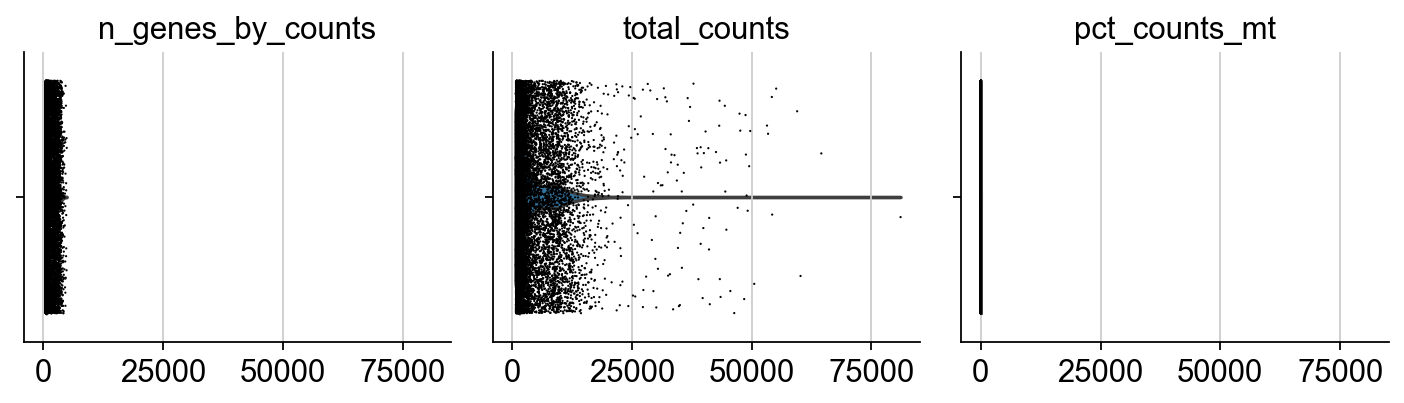

In [40]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

### Filter out mitochondrial and over-expressing cells

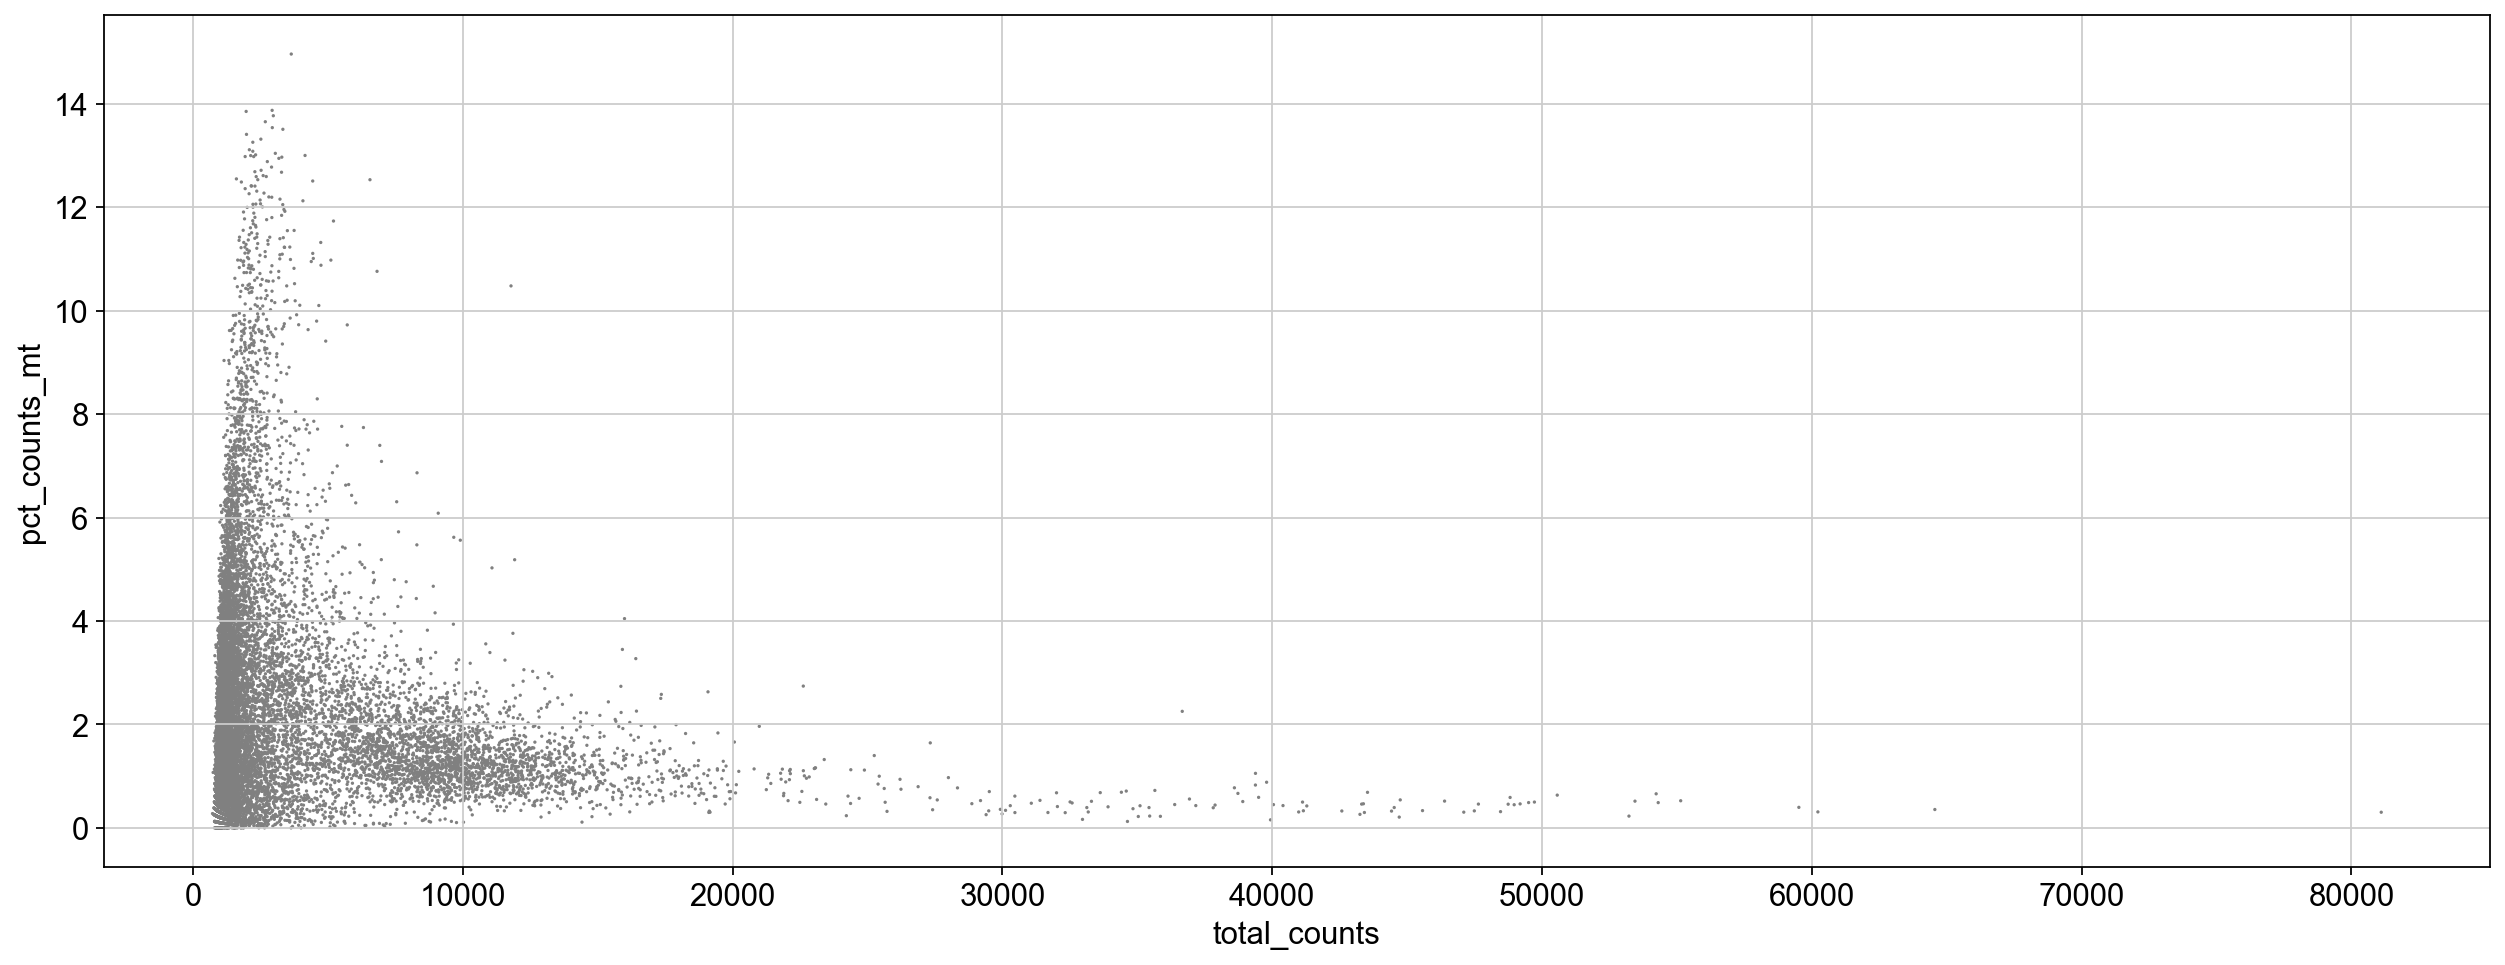

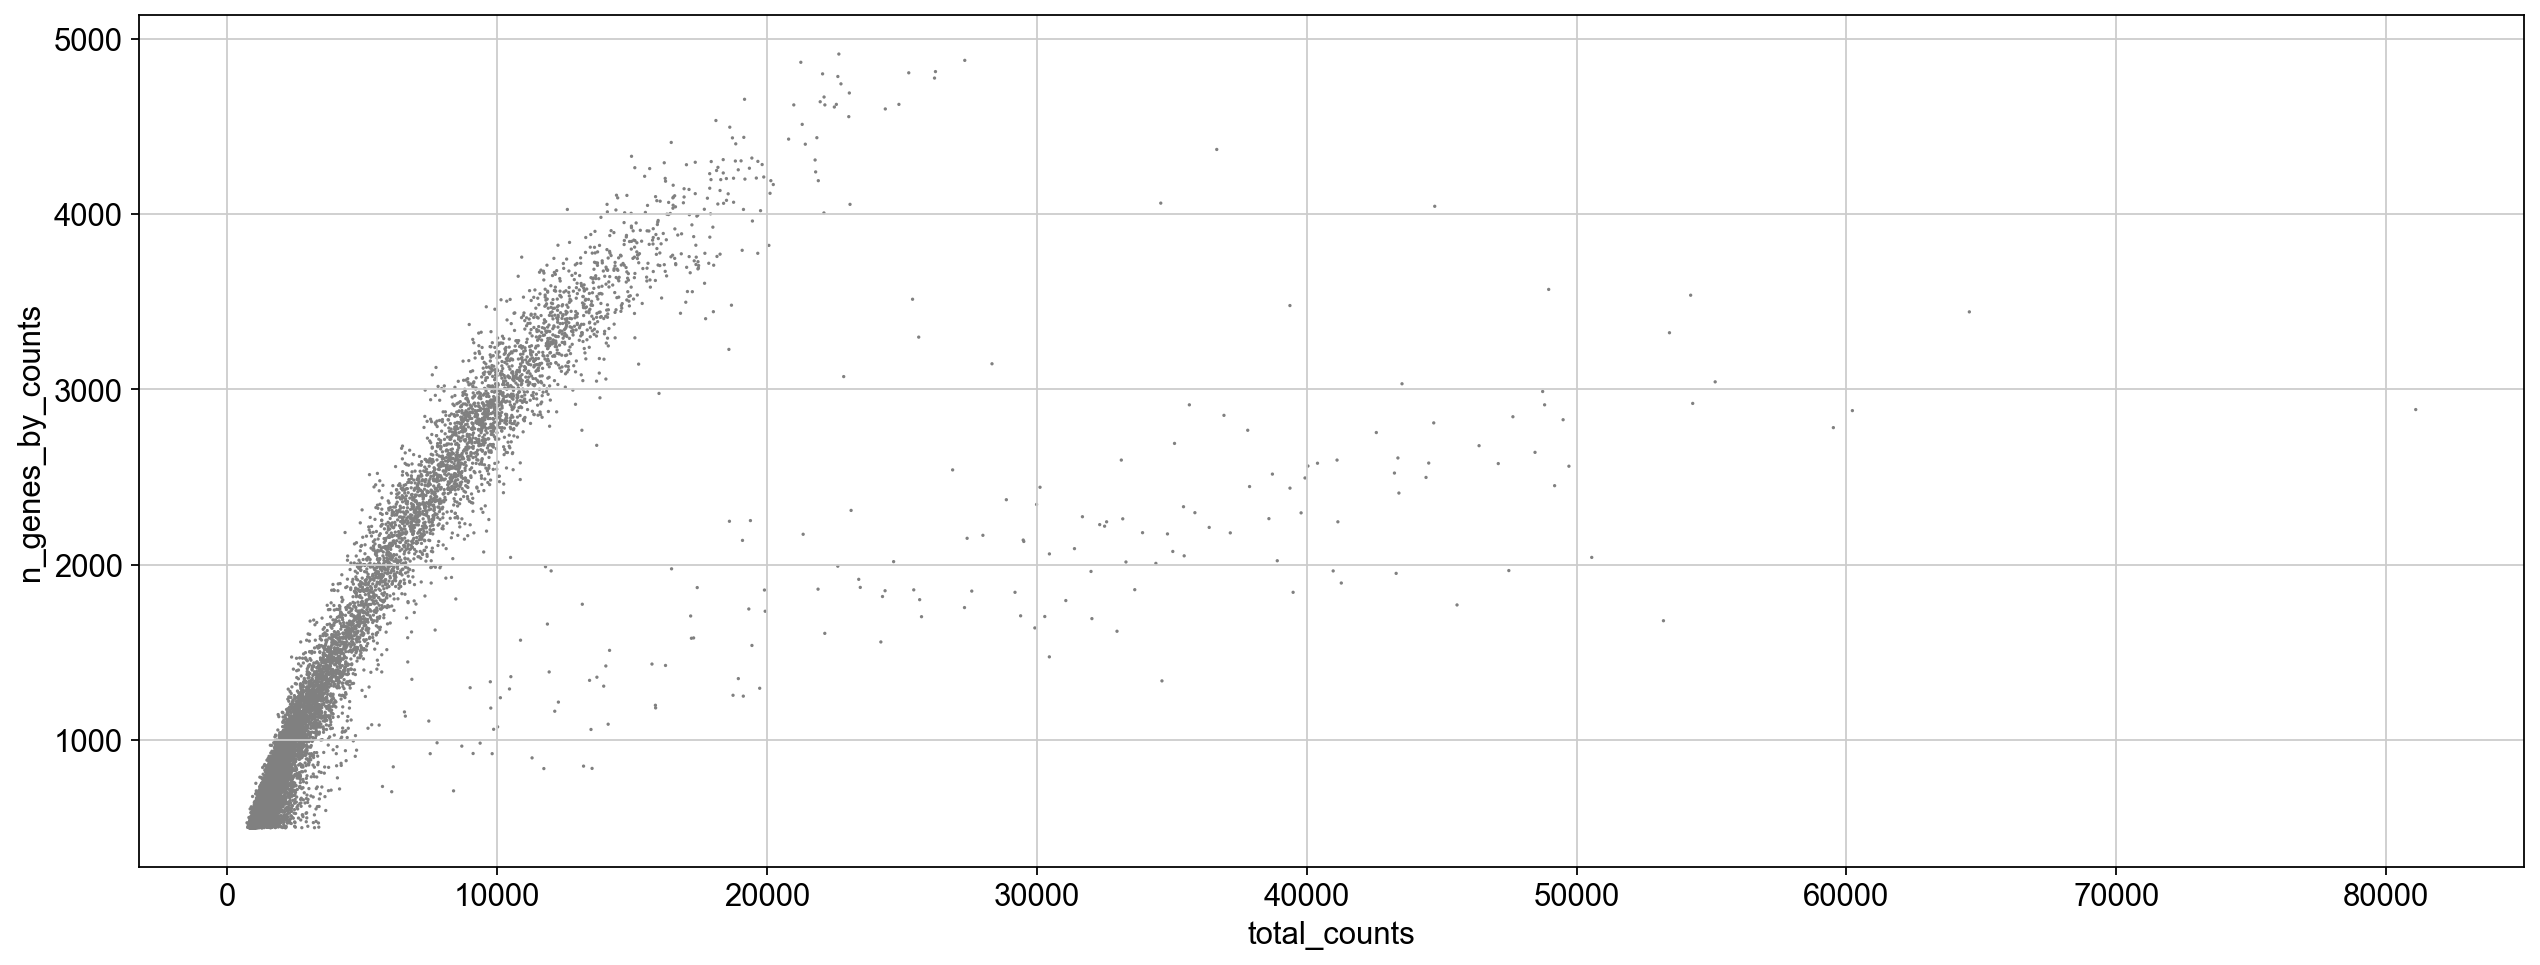

In [41]:
sc.settings.set_figure_params(dpi=80, facecolor='white', figsize=[15,7]) #Makes the figures a bit smaller
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

We'll throw out anything super high in mitochondrial gene fraction, and anything super high in number of genes (WHY I don't know, that's just something we do).

In [43]:
adata = adata[adata.obs.n_genes_by_counts < 3500, :]
adata = adata[adata.obs.pct_counts_mt < 7, :]

c:\users\smc\anaconda3\envs\sc\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
c:\users\smc\anaconda3\envs\sc\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


# Normalize, logarithmize, filter for highly variable genes

Up until now we have not done anything to the raw data in adata.X, that changes now, as we normalize each observation to have a total number of counts of 10,000, unfortunately we lose the raw counts, but we could always get it back by using .obs['total_counts']

In [44]:
sc.pp.normalize_total(adata, target_sum=1e4)
np.sum(adata.X,axis=1) #Just to show that each observation now sums to 10,000

c:\users\smc\anaconda3\envs\sc\lib\site-packages\scanpy\preprocessing\_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)


array([10000., 10000., 10000., ..., 10000., 10000., 10000.], dtype=float32)

In [46]:
old = adata.X.copy()

Now we will replace the adata.X raw data with the natural log of (adata.X+1) to avoid pesky negative infinities

In [47]:
sc.pp.log1p(adata)

### Find highly variable genes

This will create a few new entries in the .var table, one of which (highly_variable) is a True/False assessment of whether that gene is highly variable, all PCA analysis afterwards will look at this and only include genes marked as True

In [61]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


We can visualize these genes and their dispersions.

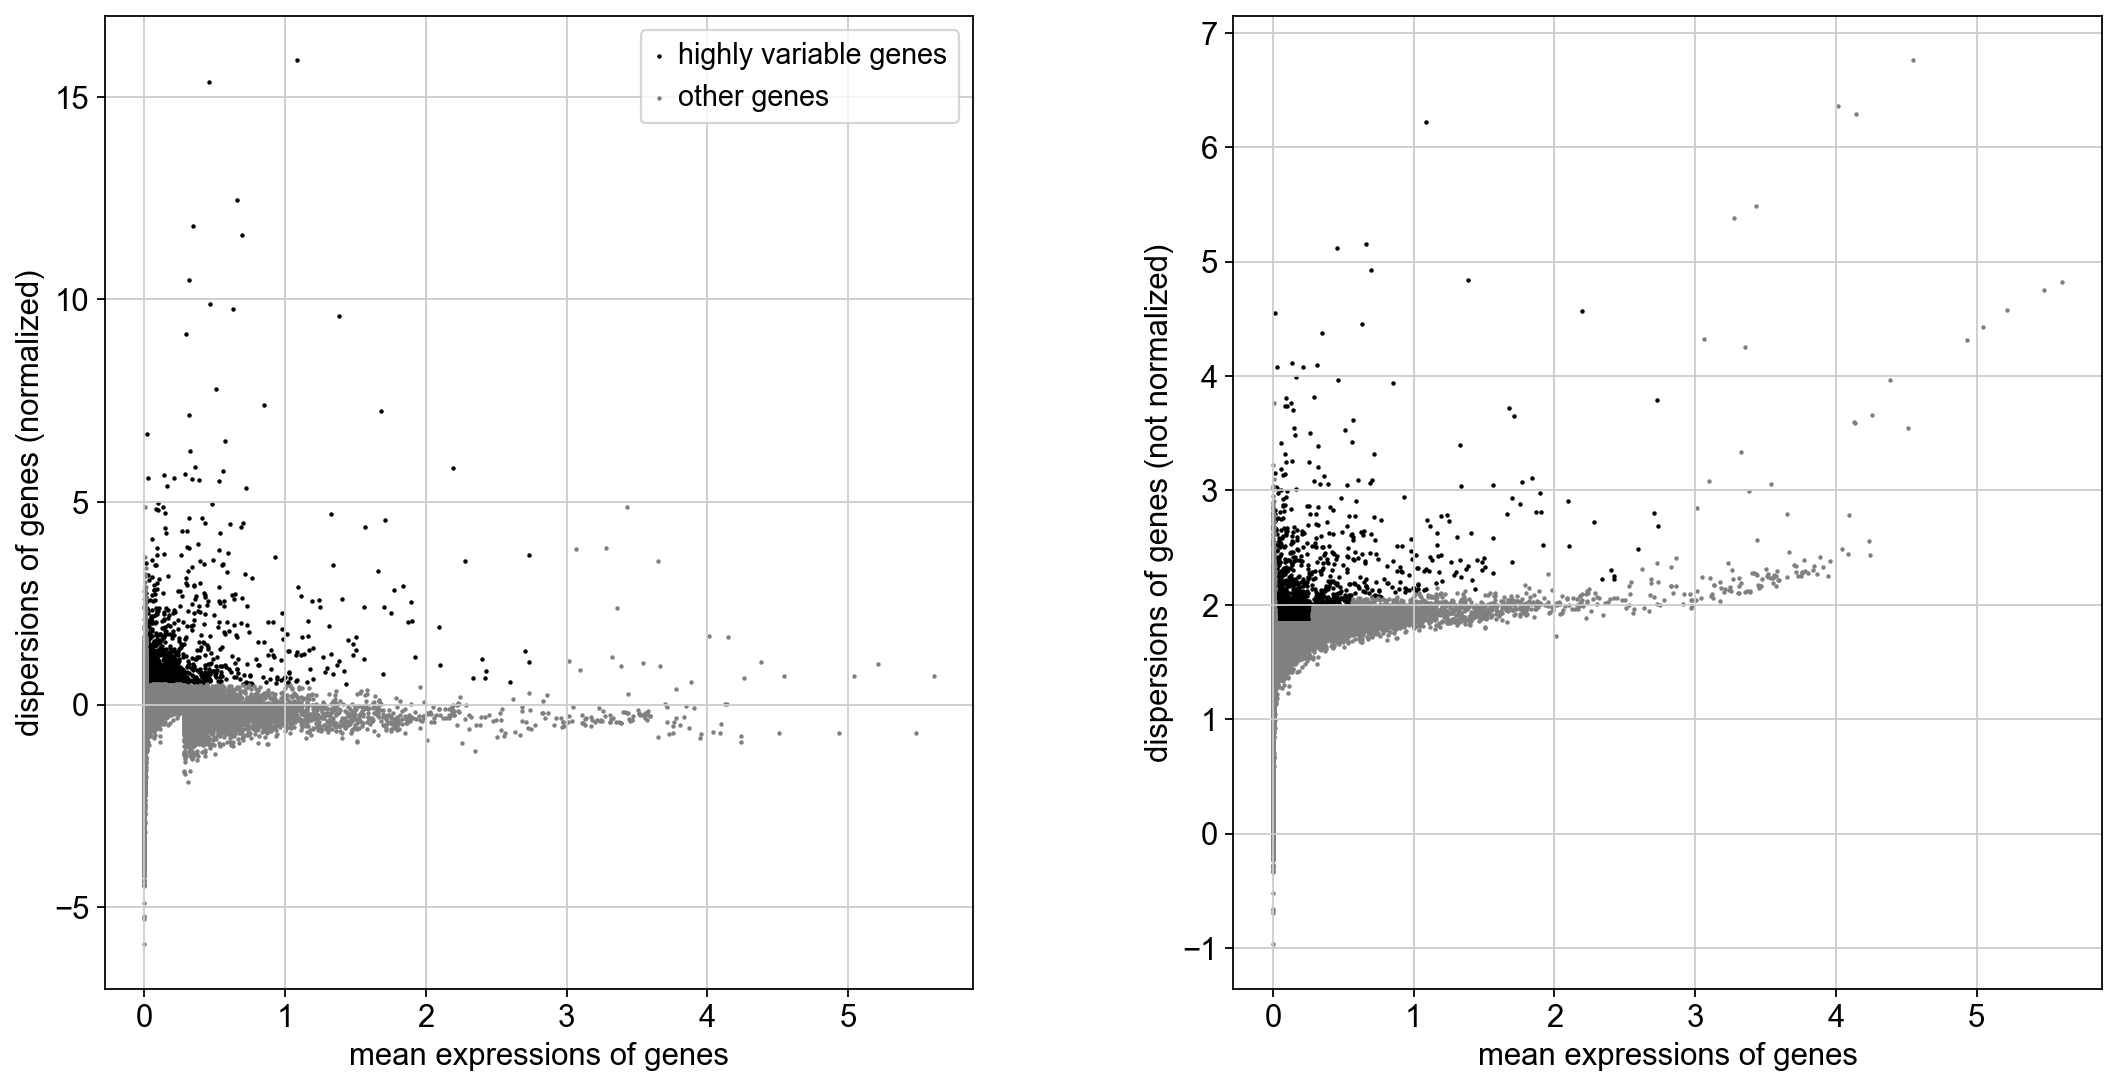

In [62]:
sc.settings.set_figure_params(dpi=80, facecolor='white', figsize=[8,8]) #Makes the figures a bit smaller
sc.pl.highly_variable_genes(adata)

In [63]:
np.sum(adata.var['highly_variable'])

2602

In [64]:
hvadata = adata.copy()
hvadata = hvadata[:, hvadata.var.highly_variable]

c:\users\smc\anaconda3\envs\sc\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


Regress out effects of total counts per cell and the percentage of mitochondrial genes expressed. Scale the data to unit variance.

In [65]:
sc.pp.regress_out(hvadata, ['total_counts'])
sc.pp.scale(hvadata, max_value=10)

regressing out ['total_counts']
    finished (0:00:39)


# PCA

Do the pca, note that we are doing it on the new hvadata, which is the version with only highly variable genes

In [70]:
sc.tl.pca(hvadata, svd_solver='arpack')
hvadata.obsm['X_pca'].shape #Just to show where the PCA data is stored

computing PCA
    on highly variable genes
    with n_comps=50


c:\users\smc\anaconda3\envs\sc\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


    finished (0:00:03)


(12450, 50)

Plot a scatterplot of the first and second PCA components

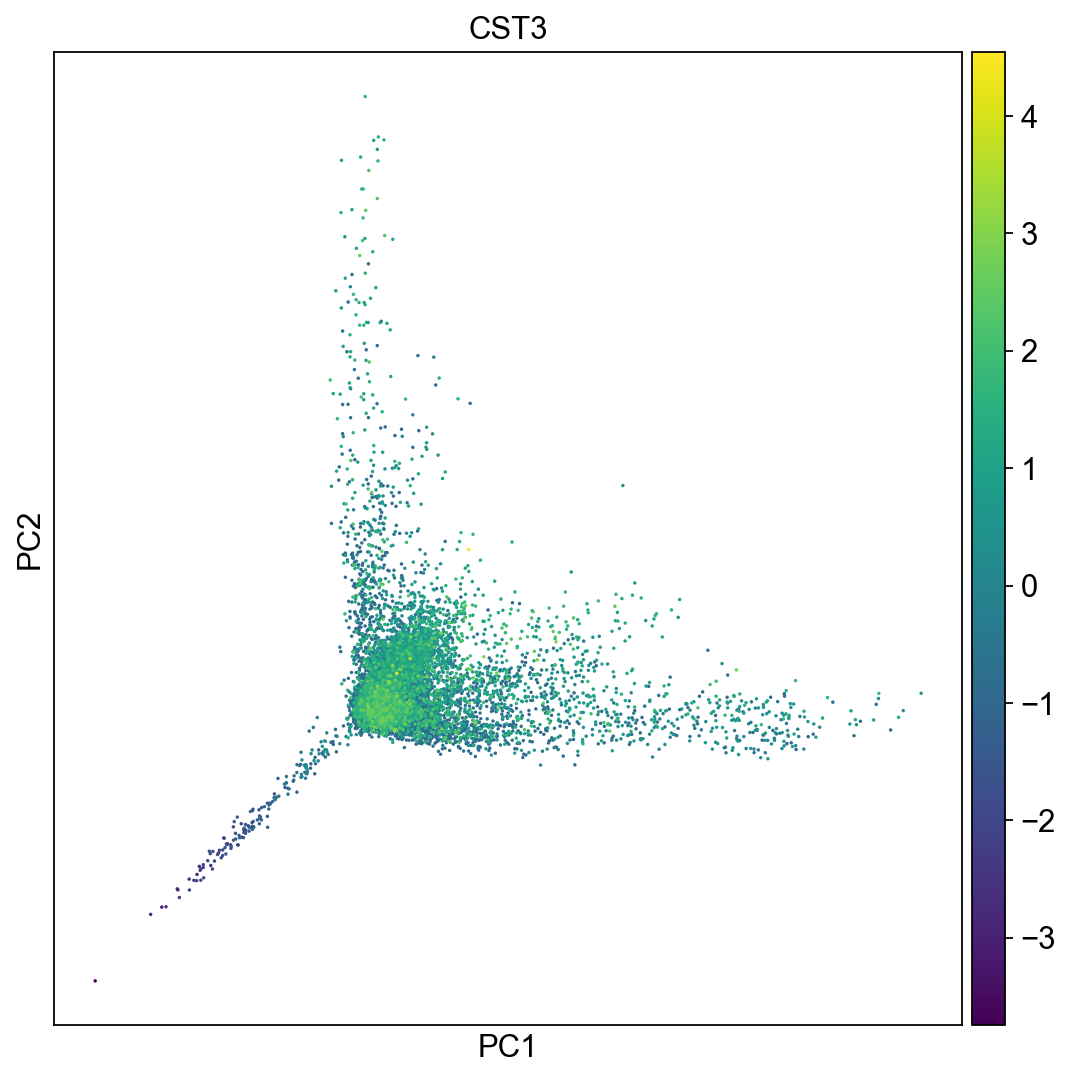

In [71]:
sc.pl.pca(hvadata, color='CST3')

Look at how much of the variance is explained by each PCA component, we will use this to decide how many principal components to keep

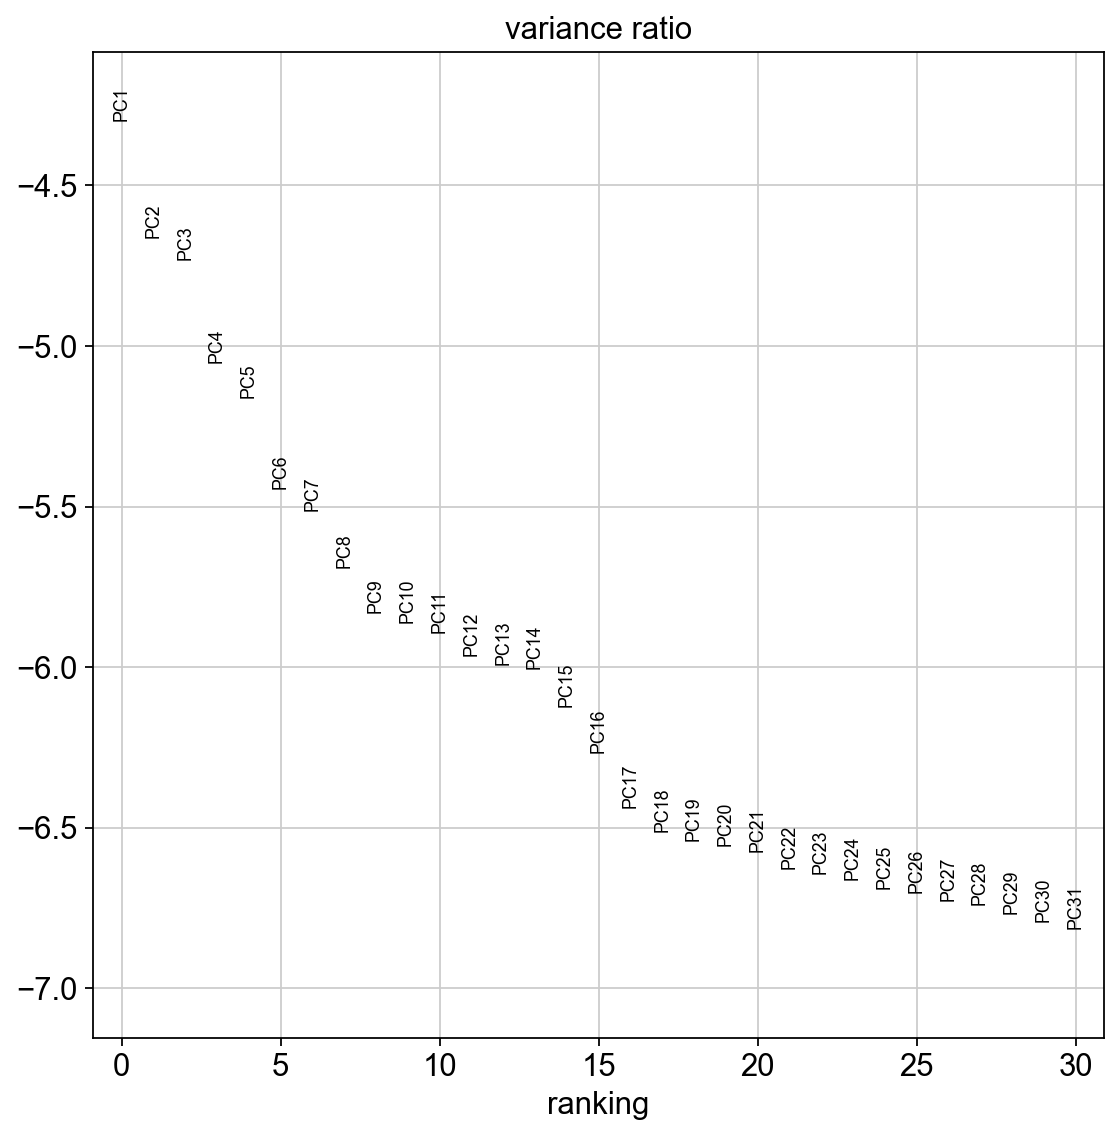

In [72]:
sc.pl.pca_variance_ratio(hvadata, log=True)

Now we compute connectivities between observations, I am not sure exactly what this does, I usually just do UMAP on the PCA results, but this uses the connectivities somehow

In [73]:
sc.pp.neighbors(hvadata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:17)


# UMAP

### UMAP and plotting

In [77]:
sc.tl.umap(hvadata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


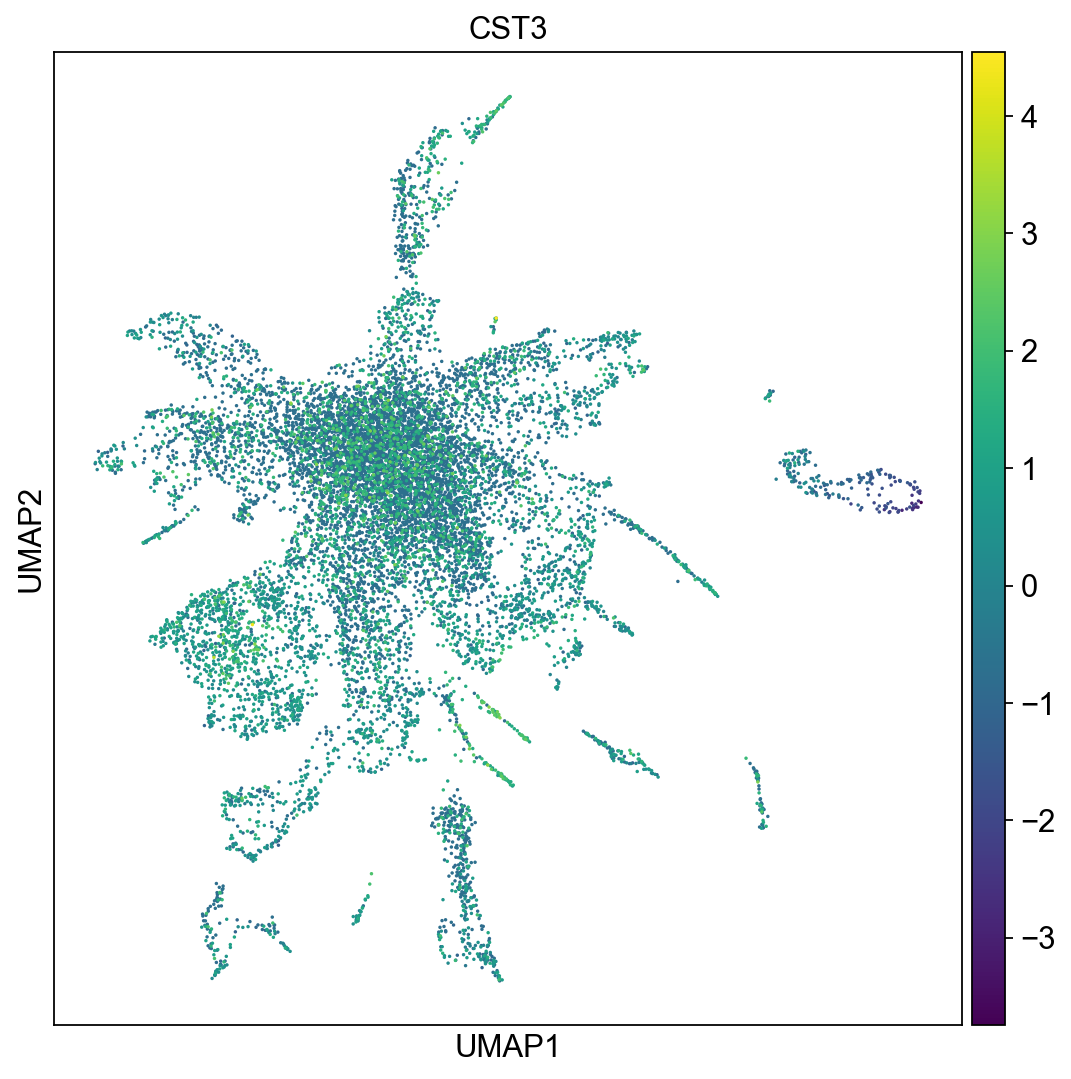

In [78]:
sc.pl.umap(hvadata, color=['CST3'])

### Clustering

In [79]:
sc.tl.leiden(hvadata)

running Leiden clustering
    finished: found 27 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)


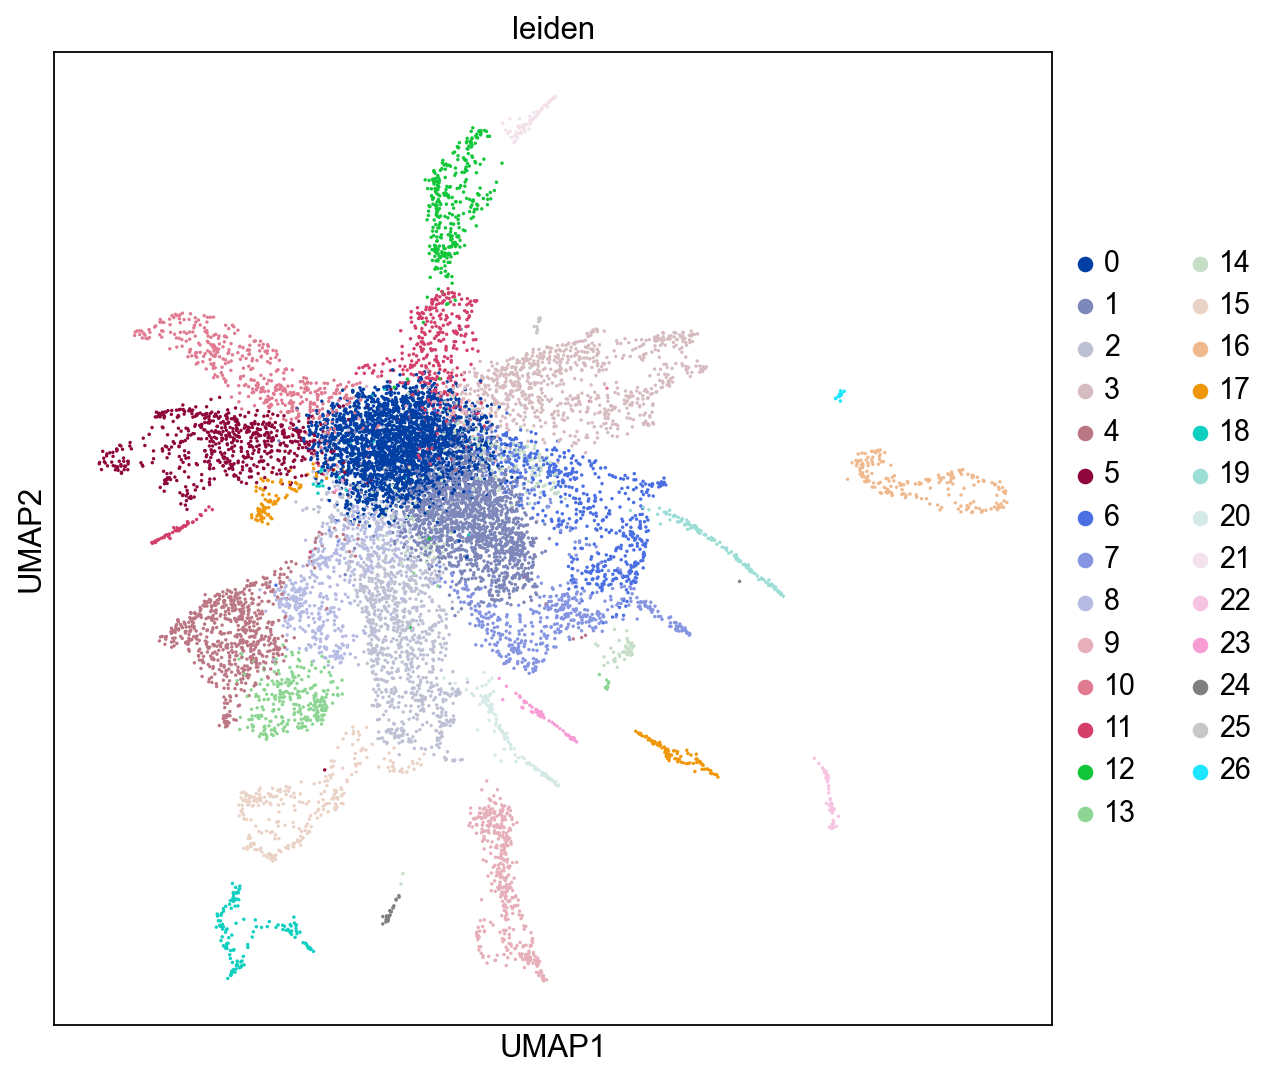

In [80]:
sc.pl.umap(hvadata, color=['leiden'])

### Plotting in seaborn and filtering

The scanpy umap plotter is not as nice as seaborn, but we have all of the information so we can use seaborn.

In [81]:
hvadata

AnnData object with n_obs × n_vars = 12450 × 2602
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

Our umap data is stored in the hvadata.obsm['X_umap'] for each observation

In [82]:
hvadata.obsm['X_umap']

array([[ 9.113827  , -5.9806986 ],
       [-0.7848668 ,  3.74481   ],
       [-0.99683696,  5.225136  ],
       ...,
       [-3.3055182 , -4.6511703 ],
       [-3.3216481 ,  3.9640884 ],
       [ 3.3794403 ,  4.592689  ]], dtype=float32)

Let's make a dataframe of our cells with all of the useful information.

In [84]:
df = pd.DataFrame(hvadata.obsm['X_umap'], index=hvadata.obs.index, columns=['X', 'Y'])
df['Cluster'] = hvadata.obs['leiden'] 
df['Counts'] = hvadata.obs['total_counts']

Now let's use seaborn to plot, we will go ahead and color the clusters and size by total reads

<AxesSubplot:xlabel='X', ylabel='Y'>

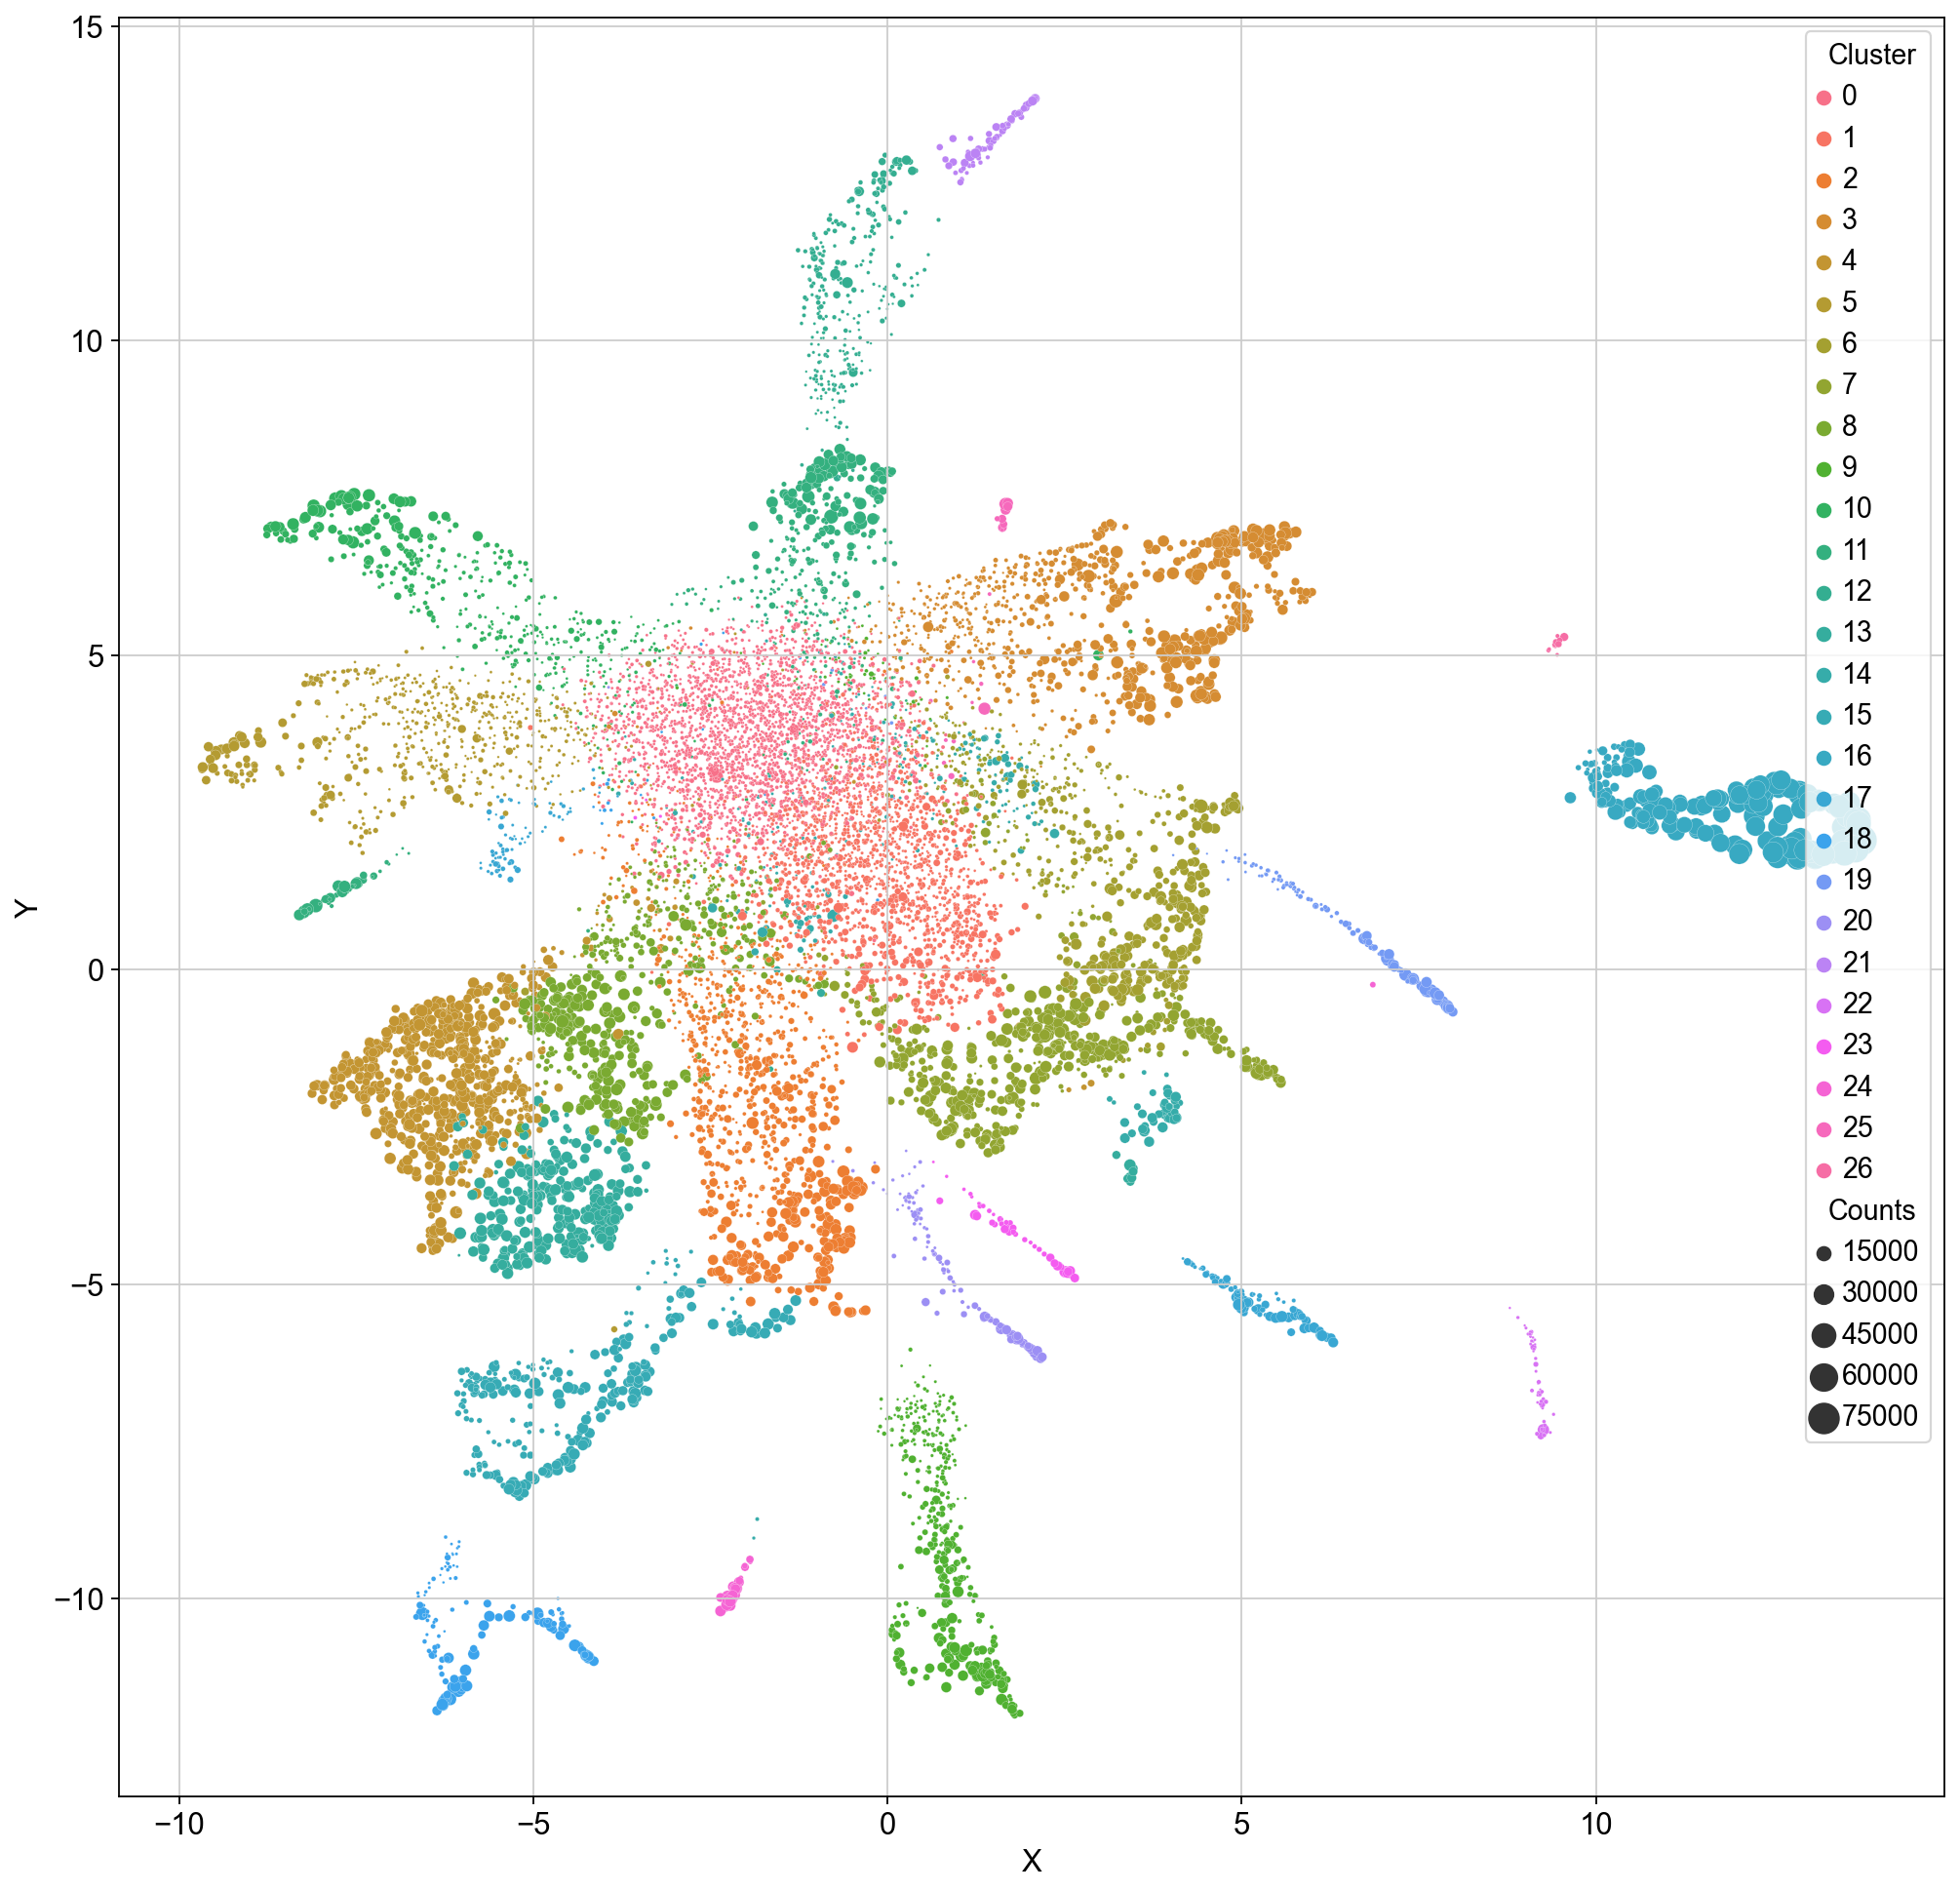

In [86]:
plt.figure(figsize=[15,15])
sns.scatterplot(data=df, x='X', y='Y', hue='Cluster', size='Counts', sizes=(1,200))

For the colorblind, plotly can offer a nice, interactive alternative to seaborn for cases of lots of colors

In [88]:
px.scatter(df, x='X', y='Y', color='Cluster', size='Counts', height=1000)

# Finding marker genes

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:16)


c:\users\smc\anaconda3\envs\sc\lib\site-packages\scanpy\tools\_rank_genes_groups.py:408: RuntimeWarning:

invalid value encountered in log2



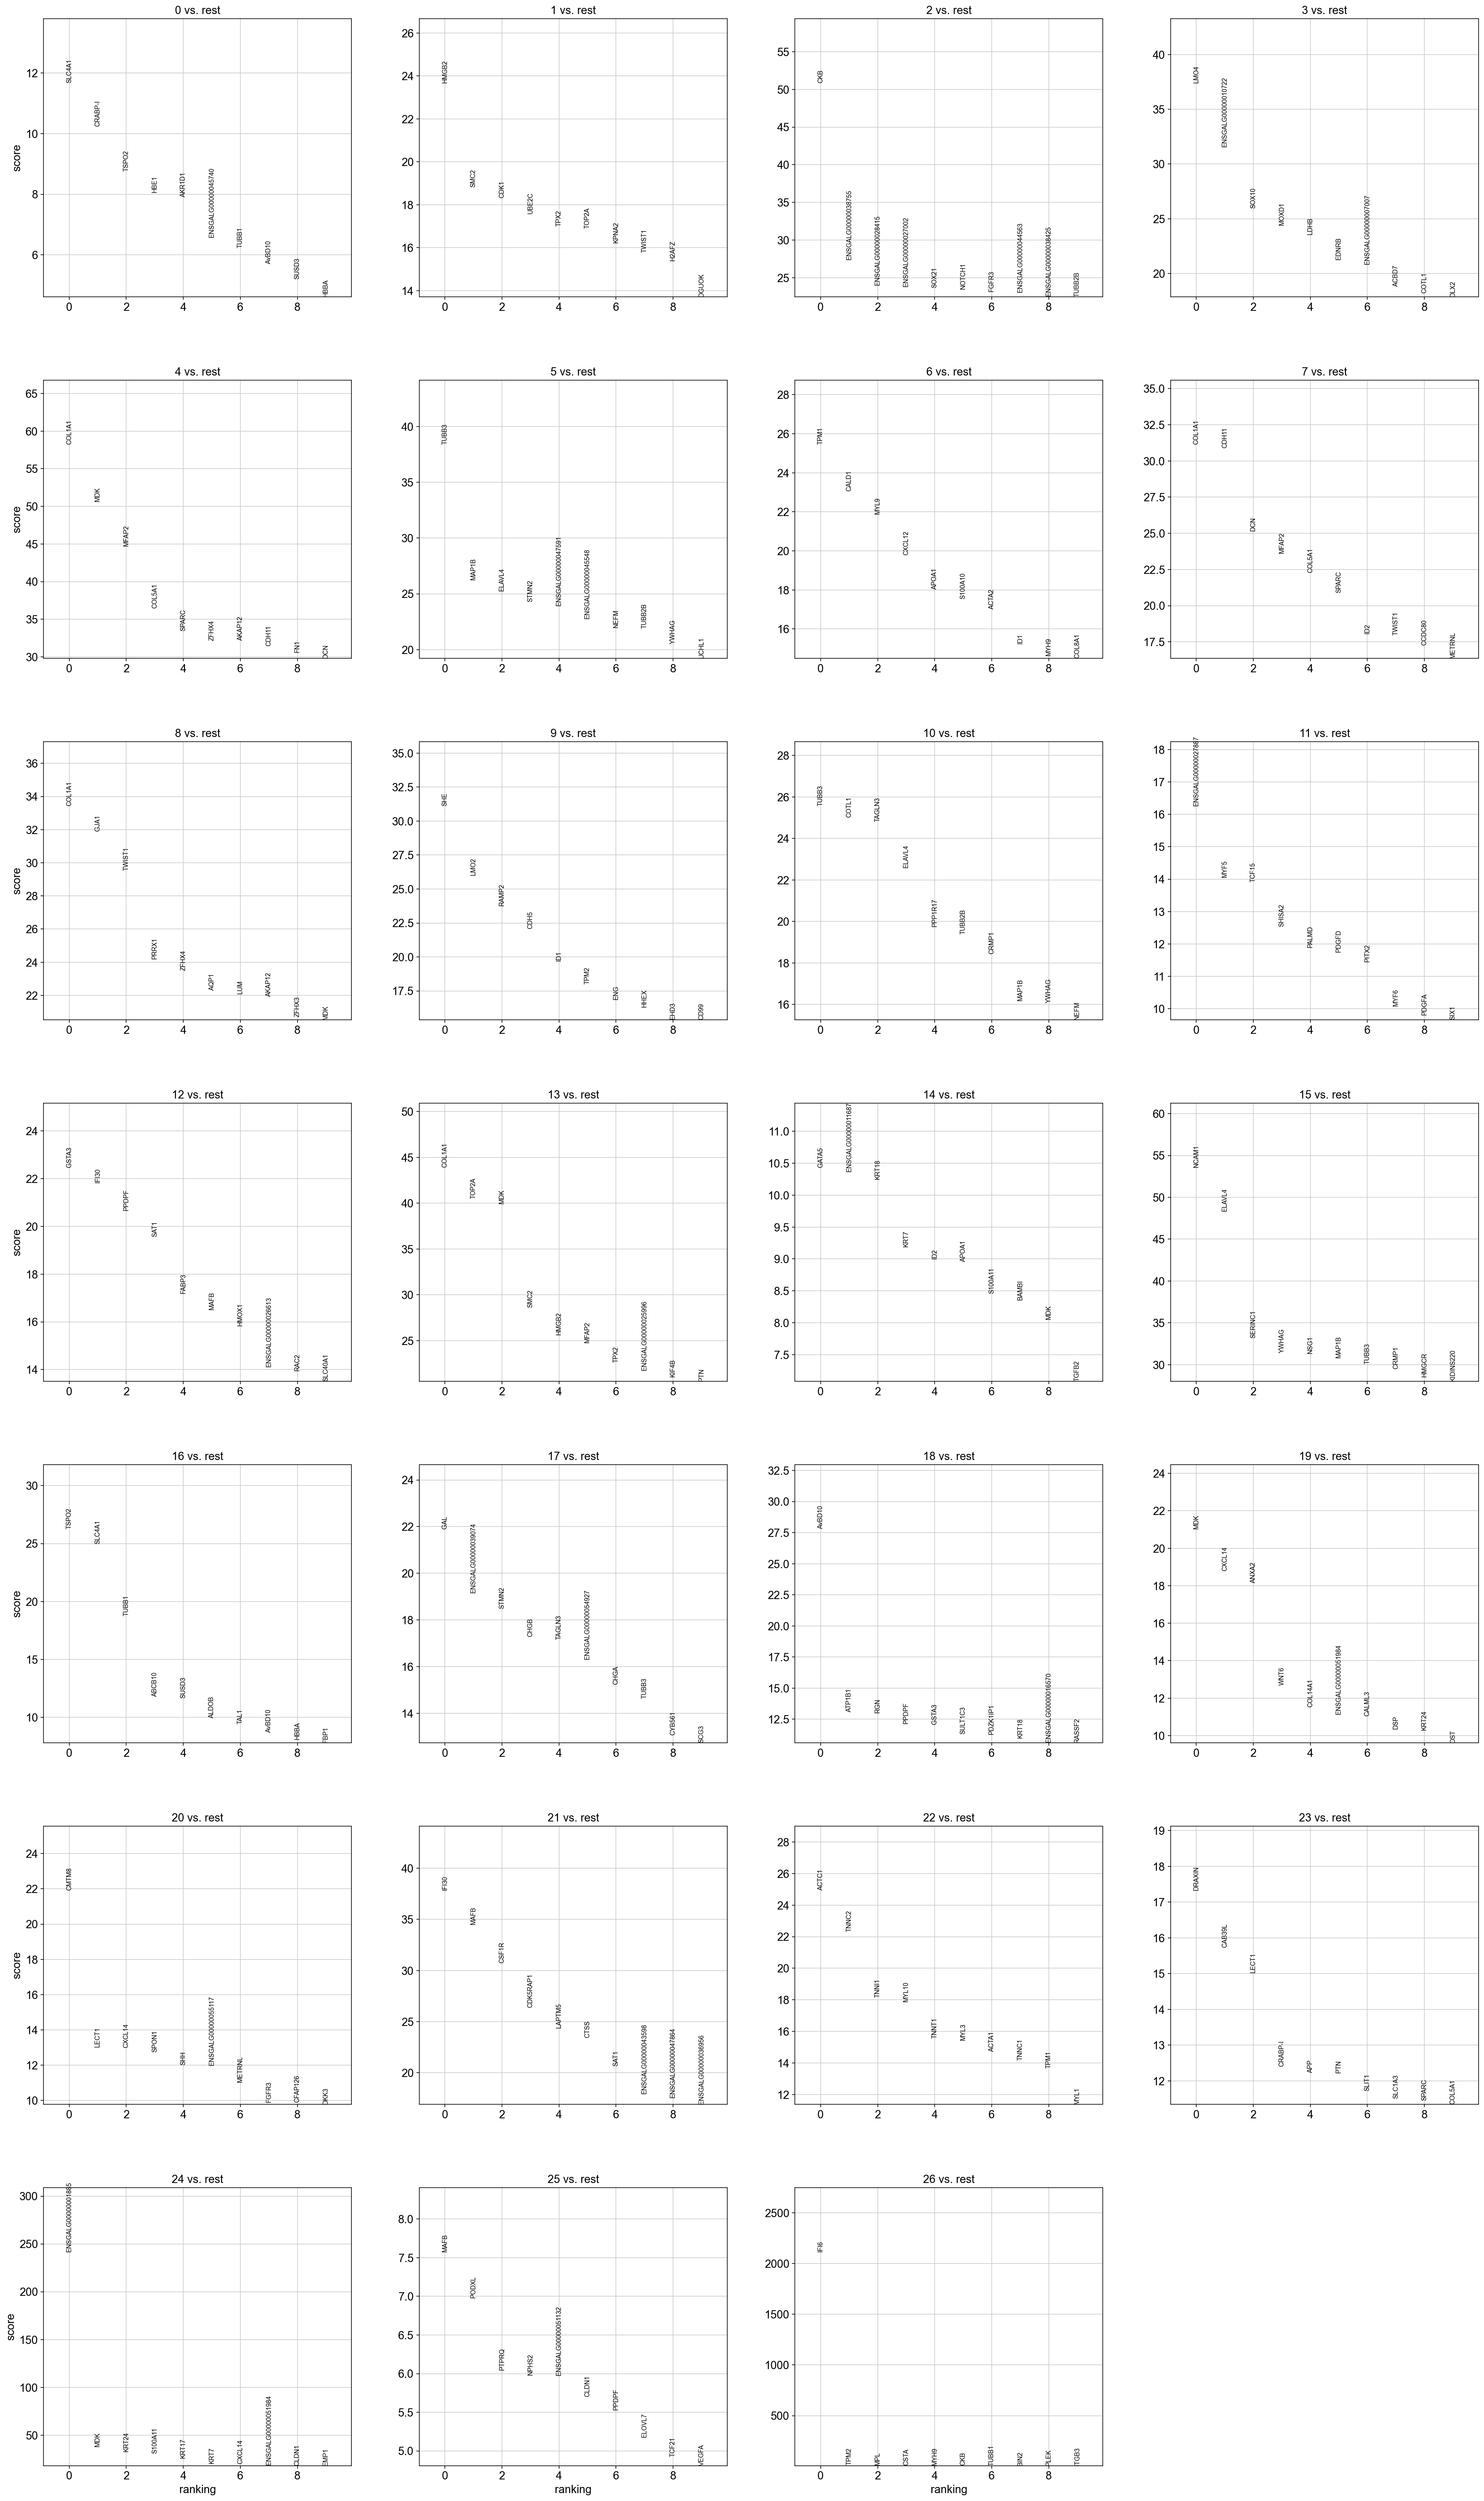

In [89]:
sc.tl.rank_genes_groups(hvadata, 'leiden', method='t-test')
sc.pl.rank_genes_groups(hvadata, n_genes=10, sharey=False)

In [111]:
hvadata.write('hvadata_new.h5ad')

In [112]:
#hvadata = sc.read('hvadata_new.h5ad')

### Dot plot

In [90]:
jason_marker_genes = ['SOX21', 'GJA1','PRRX1','NCAN','KIF5C','EEF1A2','NRXN1','CAVIN4','COL8A1',
                      'CXCL12','CYTL1','DLX2','PPP1R1C','APOA1','TCF21','ANXA1','EN1',
                      'S100A1','RGS3','TCF15','MYF5','PENK','LFNG','PAX6','FAM181A','CYP2AC1','SULT1C3',
                      'ALDH1A1','DPYS','CHGA','GAL','CHRNA3','TH','LAMB4','SHH','FOXA2','CNP1','DRAXIN']

c:\users\smc\anaconda3\envs\sc\lib\site-packages\anndata\_core\anndata.py:1094: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



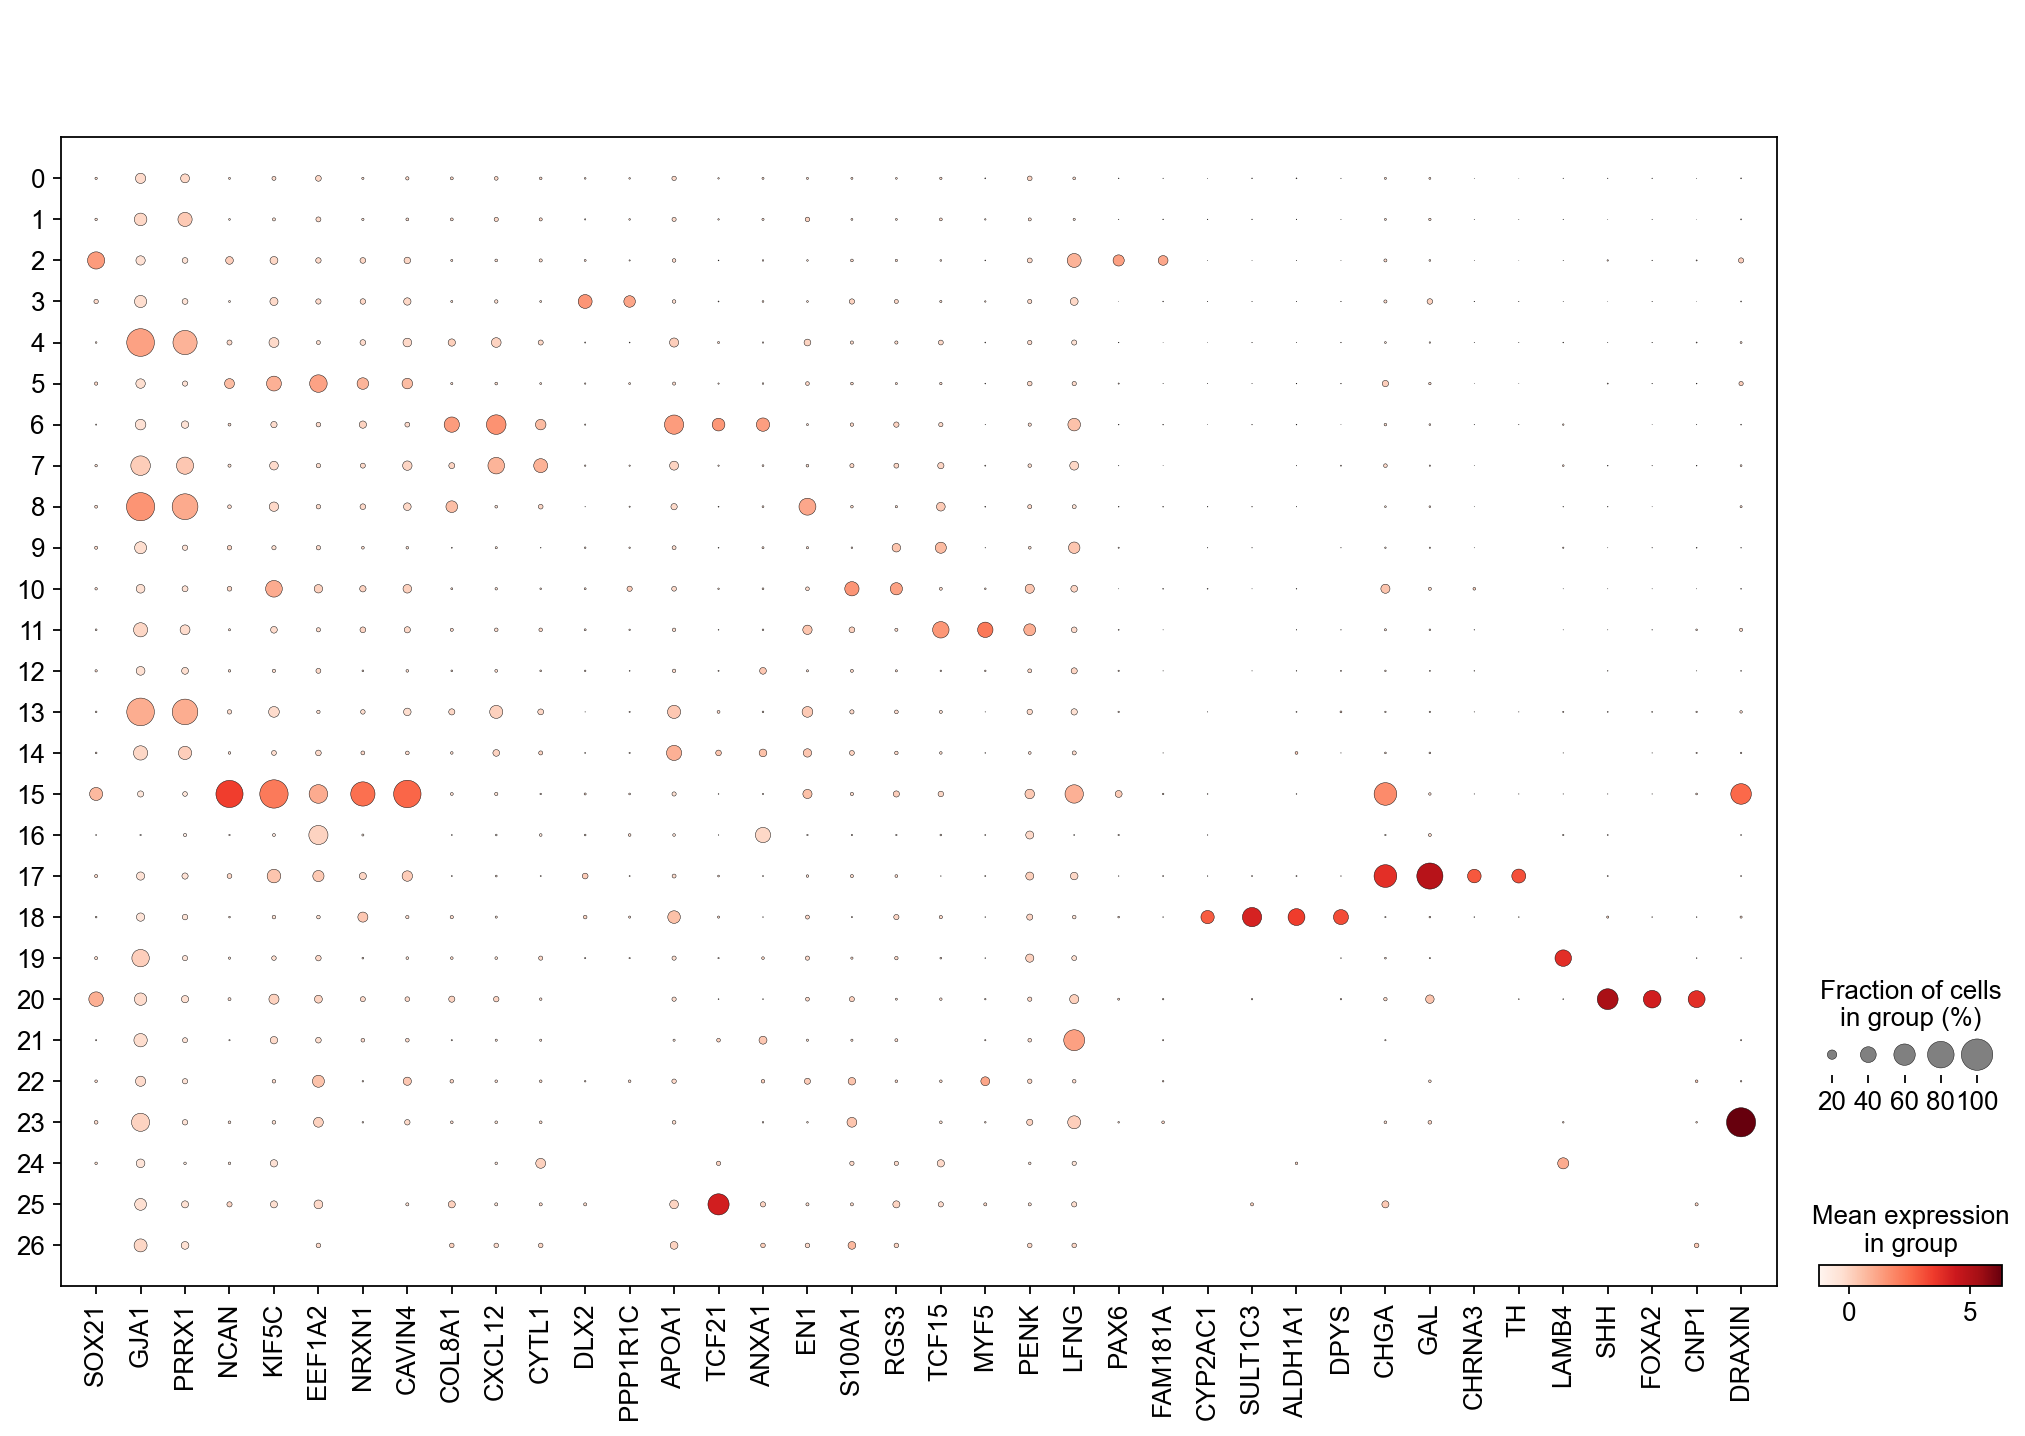

In [91]:
sc.pl.dotplot(hvadata, jason_marker_genes, groupby='leiden');